In [1]:
from xcube.core.store import find_data_store_extensions
from xcube.core.store import get_data_store_params_schema
from xcube.core.store import new_data_store

# Utilities for notebook visualization
import shapely.geometry
import IPython.display
from IPython.display import JSON
import matplotlib.pyplot as plt

In [2]:
import dask.distributed
dask.distributed.Client(processes=True)

C:\Users\norma\mamba\envs\xcube\lib\site-packages\distributed\node.py:182: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 55868 instead
  warnings.warn(


Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:55868/status,
Dashboard: http://127.0.0.1:55868/status,Workers: 4
Total threads: 12,Total memory: 15.85 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:55869,Workers: 4
Dashboard: http://127.0.0.1:55868/status,Total threads: 12
Started: Just now,Total memory: 15.85 GiB
Comm: tcp://127.0.0.1:55888,Total threads: 3
Dashboard: http://127.0.0.1:55891/status,Memory: 3.96 GiB
Nanny: tcp://127.0.0.1:55872,


In [3]:
JSON({e.name: e.metadata for e in find_data_store_extensions()})

<IPython.core.display.JSON object>

In [4]:
get_data_store_params_schema('smos')

In [5]:
store = new_data_store('smos')

In [6]:
store.get_open_data_params_schema()

In [7]:
JSON(store.list_data_ids())

<IPython.core.display.JSON object>

In [8]:
ds = store.open_data("SMOS-L2C-SM", time_range=("2023-05-01", "2023-05-02"))

In [9]:
ds

<xarray.Dataset>
Dimensions:            (time: 13, lat: 4032, lon: 8192, bnds: 2)
Coordinates:
  * lat                (lat) float64 88.57 88.53 88.48 ... -88.48 -88.53 -88.57
  * lon                (lon) float64 -180.0 -179.9 -179.9 ... 179.9 179.9 180.0
  * time               (time) datetime64[ns] 2023-05-01T01:54:46.500000 ... 2...
    time_bnds          (time, bnds) datetime64[ns] dask.array<chunksize=(13, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    Chi_2              (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Chi_2_P            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_X            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    N_RFI_Y            (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    RFI_Prob           (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture      (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>
    Soil_Moisture_DQX  (time, lat, lon) float32 dask.array<chunksize=(1, 4032, 8192), meta=np.ndarray>

In [10]:
ds.time

<xarray.DataArray 'time' (time: 13)>
array(['2023-05-01T01:54:46.500000000', '2023-05-01T03:34:51.500000000',
       '2023-05-01T05:14:55.500000000', '2023-05-01T06:55:00.500000000',
       '2023-05-01T07:44:59.000000000', '2023-05-01T08:35:05.000000000',
       '2023-05-01T10:15:09.000000000', '2023-05-01T11:55:13.000000000',
       '2023-05-01T14:25:18.000000000', '2023-05-01T16:55:27.000000000',
       '2023-05-01T18:35:32.000000000', '2023-05-01T20:15:36.000000000',
       '2023-05-01T21:55:40.500000000'], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2023-05-01T01:54:46.500000 ... 2023-05-01T...
Attributes:
    long_name:      time
    standard_name:  time
    bounds:         time_bnds

In [11]:
ds.time_bnds

<xarray.DataArray 'time_bnds' (time: 13, bnds: 2)>
dask.array<open_dataset-870efa009fa922dd000592fc41e37a87time_bnds, shape=(13, 2), dtype=datetime64[ns], chunksize=(13, 2), chunktype=numpy.ndarray>
Coordinates:
  * time       (time) datetime64[ns] 2023-05-01T01:54:46.500000 ... 2023-05-0...
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(13, 2), meta=np.ndarray>
Dimensions without coordinates: bnds

In [12]:
ds.Soil_Moisture

<xarray.DataArray 'Soil_Moisture' (time: 13, lat: 4032, lon: 8192)>
dask.array<open_dataset-870efa009fa922dd000592fc41e37a87Soil_Moisture, shape=(13, 4032, 8192), dtype=float32, chunksize=(1, 4032, 8192), chunktype=numpy.ndarray>
Coordinates:
  * lat      (lat) float64 88.57 88.53 88.48 88.44 ... -88.48 -88.53 -88.57
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 2023-05-01T01:54:46.500000 ... 2023-05-01T...
Attributes:
    units:    m3 m-3

In [13]:
ds.Soil_Moisture.data.visualize()

CytoscapeWidget(cytoscape_layout={'name': 'dagre', 'rankDir': 'BT', 'nodeSep': 10, 'edgeSep': 10, 'spacingFact…

In [14]:
ds.Soil_Moisture.compute()

TimeStepLoader.__getstate__() {'dataset_paths': ['D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T012809_20230501T022124_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T030815_20230501T040128_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T044819_20230501T054132_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T062824_20230501T072137_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T071819_20230501T081139_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T080828_20230501T090142_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T094832_20230501T104146_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T112836_20230501T122150_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMU

<xarray.DataArray 'Soil_Moisture' (time: 13, lat: 4032, lon: 8192)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lat      (lat) float64 88.57 88.53 88.48 88.44 ... -88.48 -88.53 -88.57
  * lon      (lon) float64 -180.0 -179.9 -179.9 -179.8 ... 179.9 179.9 180.0
  * time     (time) datetime64[ns] 2023-05-01T01:54:46.500000 ... 2023-05-01T...
Attributes:
    units:    m3 m-3

TimeStepLoader.__getstate__() {'dataset_paths': ['D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T012809_20230501T022124_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T030815_20230501T040128_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T044819_20230501T054132_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T062824_20230501T072137_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T071819_20230501T081139_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T080828_20230501T090142_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T094832_20230501T104146_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T112836_20230501T122150_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMU

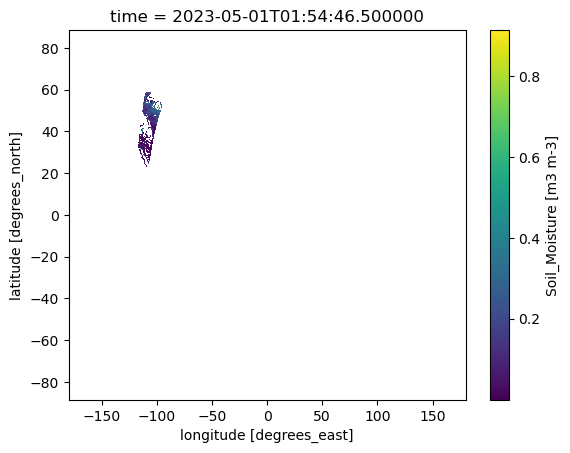

In [15]:
ds.Soil_Moisture.isel(time=0).plot.imshow()

Using the `lazy_load=True` setting forces lazy (deferred) loading of variable data of the SMOS L2 products.
Variable data is only loaded on demand. This saves CPU and memory when opening the data cube from the store.
However, this mode will not work with `dask.distributed` using multi-processes or using a cluster as 
indicated by the emitted warnings.

TimeStepLoader.__getstate__() {'dataset_paths': ['D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T012809_20230501T022124_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T030815_20230501T040128_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T044819_20230501T054132_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T062824_20230501T072137_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T071819_20230501T081139_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T080828_20230501T090142_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T094832_20230501T104146_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T112836_20230501T122150_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMU

9.7 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


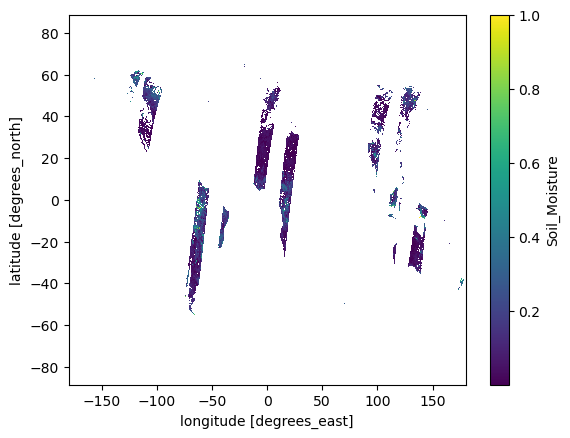

In [16]:
%%timeit -n 1 -r 1
ds.Soil_Moisture.mean("time").plot.imshow()

In [17]:
#for name, var in ds.variables.items():
#    display(name, var.encoding)

In [18]:
ds_rechunked = ds.chunk(dict(time=1, lat=4032 // 4, lon=8192 // 8))
#ds_rechunked = ds_rechunked.drop('time_bnds')
for v in ds_rechunked.variables.values():
    del v.encoding["chunks"]
    del v.encoding["preferred_chunks"]

In [19]:
ds_rechunked.to_zarr("smos.zarr", mode="w")

TimeStepLoader.__getstate__() {'dataset_paths': ['D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T012809_20230501T022124_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T030815_20230501T040128_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T044819_20230501T054132_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T062824_20230501T072137_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T071819_20230501T081139_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T080828_20230501T090142_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T094832_20230501T104146_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMUDP2_20230501T112836_20230501T122150_700_001_1', 'D:\\nckc-index/SMOS/L2SM/MIR_SMUDP2/2023/05/01/SM_OPER_MIR_SMU